In [15]:
import yfinance as yf

In [16]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [17]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

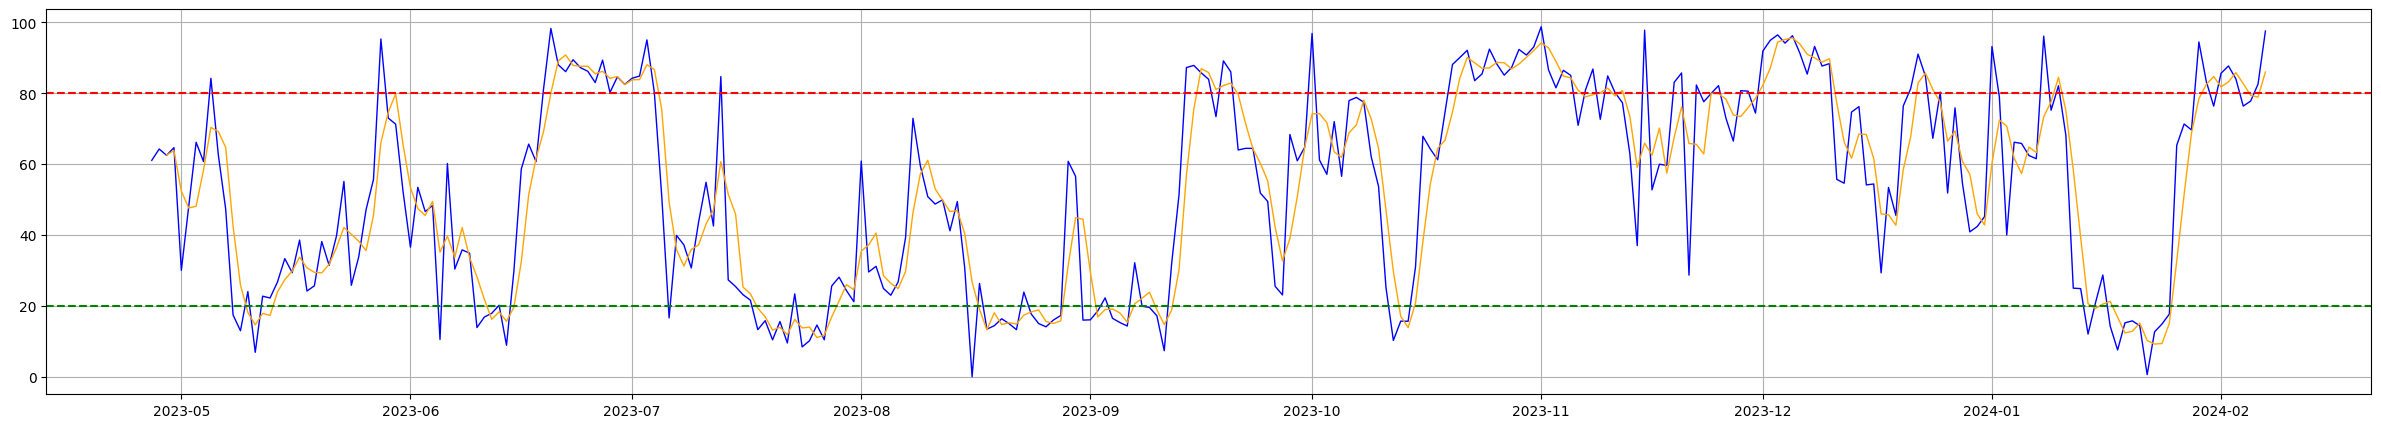

In [18]:
from algo_trader.lib.indicators.stochastic import Stochastic

df = data.iloc[-300:]
sell_threshold = 80
buy_threshold = 20
stochastic = Stochastic(buy_threshold, sell_threshold, 14)
stochastic.calculate(df)
stochastic.plot()

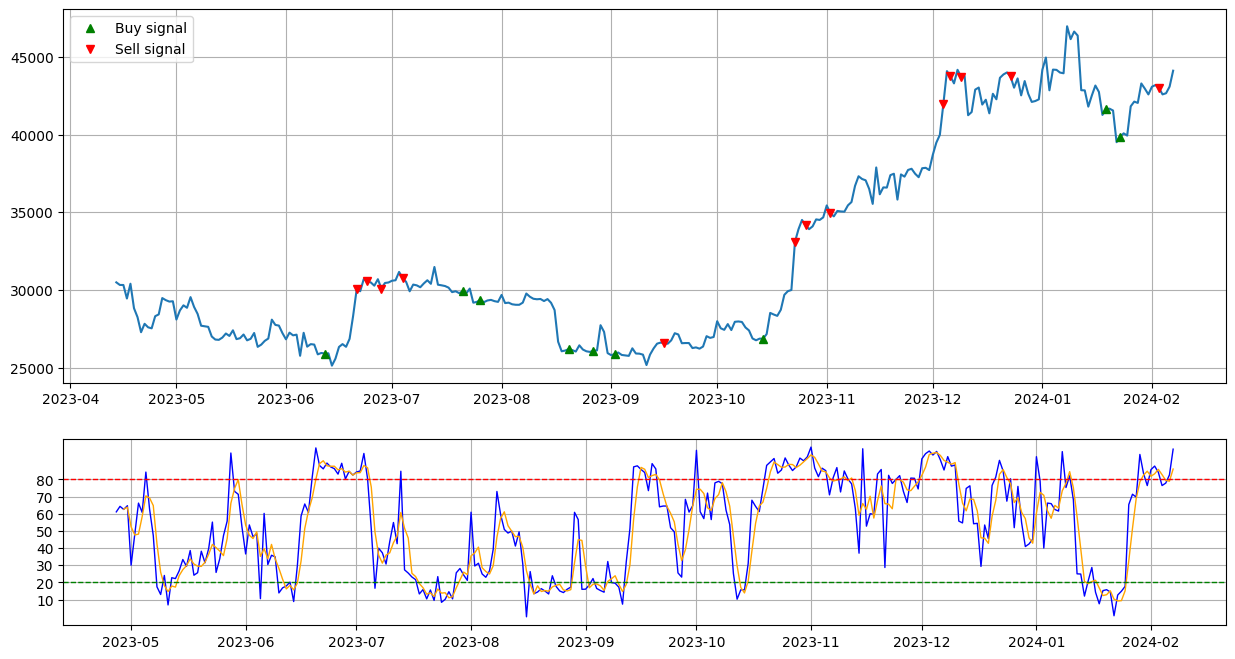

In [19]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df_stoch = stochastic.calculate(df)
df_stoch['buy_signal'] = stochastic.calc_buy_signals()
df_stoch['sell_signal'] = stochastic.calc_sell_signals()
buySignals = df_stoch[df_stoch['buy_signal'] == True]
sellSignals = df_stoch[df_stoch['sell_signal'] == True]

ax[0].plot(df_stoch.index, df_stoch.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(df_stoch["%K"], color='blue', linewidth=1)
ax[1].plot(df_stoch["%D"], color='orange', linewidth=1)
ax[1].set_yticks(range(10,90,10))
ax[1].axhline(buy_threshold, linestyle='--', linewidth=1, color='green')
ax[1].axhline(sell_threshold, linestyle='--', linewidth=1, color='red')
ax[1].grid()

In [20]:
new_record = data.iloc[-1:]
stochastic.predict_signal(new_record)

[Stochastic] Current value: Close    44109.109375
%K          97.413194
%D          92.520717
Name: 2024-02-07 00:00:00, dtype: float64
[Stochastic] Sell Threshold: 80
[Stochastic] Buy Threshold: 20
[Stochastic] Signal: Action.HOLD


<Action.HOLD: 'hold'>